**NOTA**

Los ejercicios de este notebook corresponden a la Tarea6, que debe ser entregada en equipo. 

Las fechas relevantes son:

**Envío del PR inicial:** 3 de noviembre

**Aceptación del PR:** 9 de noviembre


# Exponente(s) de Lyapunov y Universalidad

Una manera de caracterizar el caos en el sentido de *sensibilidad a condiciones iniciales* es a través de los **exponentes de Liapunov**. La idea es sencilla: si hay una dependencia *exponencial* en el tiempo a la separación de condiciones iniciales infinitesimalmente cercanas, entonces diremos que hay caos.

Por esto, simplemente monitoreamos la evolución de dos condiciones iniciales cercanas, $x_0$ y $x_0+\epsilon$, donde $\epsilon>0$ y pequeño.

Considerando mapeos en una dimensión, la distancia entre los iterados $n$ es

\begin{equation}
D_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
\end{equation}

Entonces, suponiendo que $d_n$ tiene una dependencia exponencial de $n$, para $n\to\infty$ y $\epsilon\to 0$, escribimos $d_n= \epsilon \exp(\lambda n)$, de donde obtenemos

\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \;\lim_{\epsilon\to 0} \;
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

A $\lambda(x_0)$ se le llama exponente de Lyapunov. Si $\lambda(x_0)>0$ diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.

Observaciones:

- El exponente de Lyapunov, estrictamente hablando, depende de la condición inicial $x_0$.

- En la definición del exponente de Lyapunov se require la evaluación de **dos** límites, uno que involucra al tiempo ($n\to\infty$), y otro a la condición inicial ($\epsilon\to 0$).

- La definición del exponente de Lyapunov es sutil, ya que en muchas ocasiones *sabemos* que el rango de $f(x)$ es acotado cuando $x$ está en cierto dominio, lo que entonces podría llevar erróneamente a concluir que $\lambda(x_0)=0$. (La sutileza está en que el órden de los límites no conmuta.)

Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}


**Ejercicio 1:**

- ¿Cómo se generaliza la expresión anterior para el exponente de Lyapunov en mapeos de 1 variable, a mapeos de 2 variables?


- ¿Cómo se compara el exponente de Lyapunov $\lambda(x_0)$ con $\lambda( f(x_0) )$, para el mapeo $x\mapsto f(x)$?

**Ejercicio 2:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$, para $c\in[-2,2]$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

# Universalidad

Anteriormente, obtuvimos el siguiente diagrama de bifurcaciones de la familia cuadrática:

![](diag_bifurcaciones.png)


En esta sección, analizaremos por qué ciertos aspectos de la dinámica son universales (como por ejemplo los exponentes de Feigenbaum), es decir, para una familia más amplia de mapeos, más allá de la cuadrática. Aún así, analizaremos este aspecto para la familia cuadrática.

El argumento que se presenta será más bien cualitativo; sin embargo, las observaciones que aquí se harán se pueden poner en términos rigurosos, que se conocen como la teoría de renormalización.

## Ciclos superestables

Para la familia de mapeos cuadráticos $Q_c(x) = x^2+c$, un punto particular es $x=0$, simplemente porque en $x=0$ se satisface $Q_c'(x=0)=0$ para todo valor de $c$. 
Por esto es que definiremos un *ciclo superestable* de periodo $n$ como aquél en que el punto $x=0$ forma parte del órbita periódica de periodo $n$.

Es fácil ver que en $c_0=0$ se tiene un ciclo superestable periódico de periodo 1. En este caso, uno puede sustituir $c=0$ en $Q_c(x)$, y notar que $Q_{c=0}(x)=x$ se cumple para $x=0$.

In [27]:
using Plots

In [2]:
"Mapeo cuadrático evaluado en `x`, con parámetro `c`"
Qc(x,c) = x^2 + c
Qc(x, args...) = !c(x, args[1])

"Derivada de `Qc(x,c)` respecto a `x` evaluada en `x`, con parámetro `c`"
Qc´(x,c) = 2x

Qc´

In [3]:
C0 = 0.0

0.0

In [4]:
Qc(0.0,C0) == 0.0

true

In [5]:
"""
    Qcⁿ(x, args)

Esta función define el n-enésimo iterado de Qc(x,c),
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ

La siguiente gráfica muestra el mapeo $Q_c(x)$ para $c=C_0$.

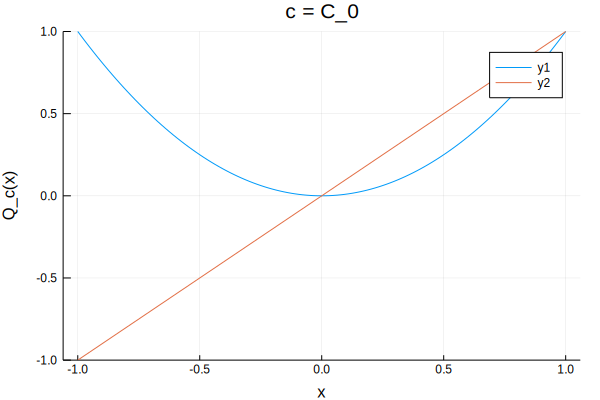

In [7]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C0,1)))
plot!(xrange, x->x)
ylims!(-1,1)
xlabel!("x")
ylabel!("Q_c(x)")
title!("c = C_0")

Para obtener el valor $c_1$ del ciclo superestable de periodo 2, debemos encontrar la $c$ tal que 

\begin{equation}
Q_c^2(0) = c^2+c = c(c+1) = 0,
\end{equation}

cuya solución, distinta de $c_0=0$, es $c_1=-1$.

In [6]:
C1 = -1.0

-1.0

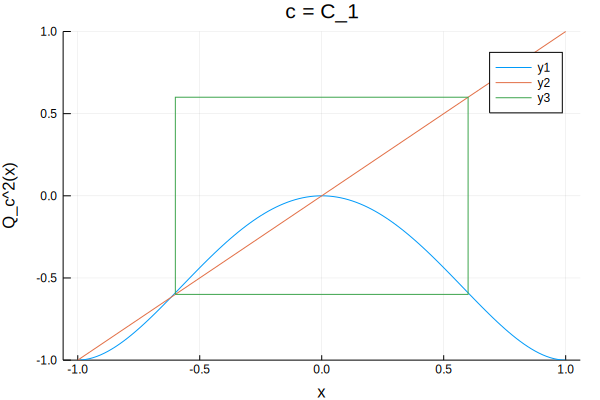

In [9]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C1,2)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.6
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
xlabel!("x")
ylabel!("Q_c^2(x)")
title!("c = C_1")

El recuadro verde en la gráfica de $C_1$ muestra un detalle de $Q_{C_1}^2(x)$ que, localmente, se *parece* a $Q_{C_0}(x)$; aunque obvio, noten que la comparación requiere de una reflexión.

A fin de encontrar el valor de $c$ en que $Q_{c}^4(x=0)=0$, usamos el método de Newton. (Usaremos [TaylorSeries.jl](https://github.com/JuliaDiff/TaylorSeries.jl) para calcular la derivada de la función `f` usando diferenciación automática.)

In [36]:
using Pkg
Pkg.add("TaylorSeries")

 Resolving package versions...
  Updating `C:\Users\Carlos Borja\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\Carlos Borja\.julia\environments\v1.0\Manifest.toml`
 [no changes]


In [7]:
using TaylorSeries

In [8]:
function roots_newton(f, x0)
    t = Taylor1(eltype(x0), 1)
    for ind = 1:100
       fT = f(x0+t)
       x0 = x0 - fT[0]/fT[1]
    end
    x0
end

roots_newton (generic function with 1 method)

In [9]:
Q4c = c -> Qcⁿ(0.0, (c, 4))
C2 = roots_newton(Q4c, -1.4)

-1.3107026413368328

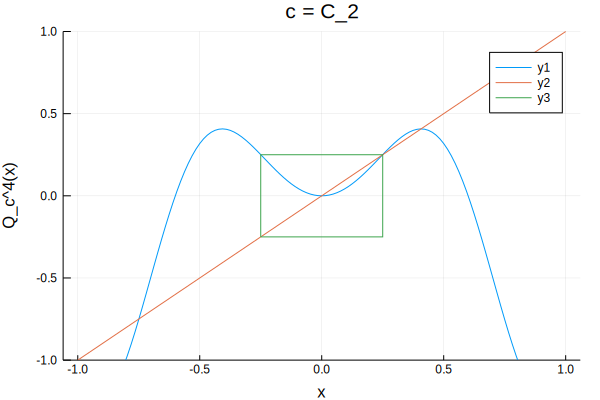

In [13]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C2,4)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.25
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])

xlabel!("x")
ylabel!("Q_c^4(x)")
title!("c = C_2")

Nuevamente, el recuadro verde en la gráfica de $C_2$ muestra un detalle de $Q_{C_2}^4(x)$ que, localmente, se *parece* a $Q_{C_0}(x)$. En este caso, la doble reflexión hace que la orientación corresponda.

In [10]:
Q8c = c -> Qcⁿ(0.0, (c, 8))
C3 = roots_newton(Q8c, -1.4)

-1.3815474844320617

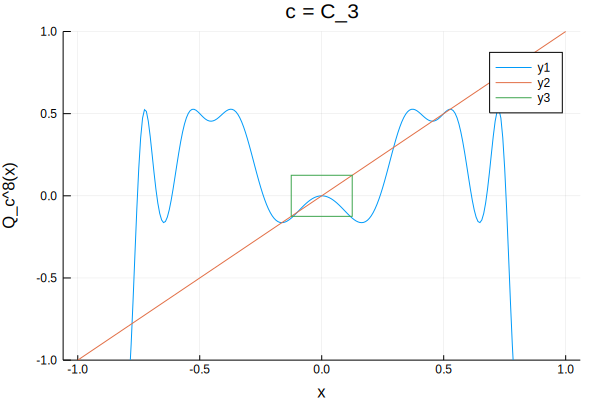

In [15]:
xrange = -1:1/128:1
plot(xrange, x->Qcⁿ(x, (C3,8)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.125
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])

xlabel!("x")
ylabel!("Q_c^8(x)")
title!("c = C_3")

**Ejercicio 3:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.) 

Nota: Es importante dar un punto suficientemente bien aproximado a $C_n$ para que el método de Newton converja bien.

In [11]:
Q16c = c -> Qcⁿ(0.0, (c, 16))
C4 = roots_newton(Q16c, -1.4)

-1.3969453597045602

In [12]:
Q32c = c -> Qcⁿ(0.0, (c, 32))
C5 = roots_newton(Q32c, -1.4)

-1.4002530812147829

In [13]:
Q64c = c -> Qcⁿ(0.0, (c, 64))
C6 = roots_newton(Q64c, -1.401)

-1.4009619629448422

In [14]:
Q128c = c -> Qcⁿ(0.0, (c, 128))
C7 = roots_newton(Q128c, -1.4011)

-1.4011138049397756

In [15]:
Q256c = c -> Qcⁿ(0.0, (c, 256))
C8 = roots_newton(Q256c, -1.40115)

-1.4011463258269463

In [16]:
Cn=[C0,C1,C2,C3,C4,C5,C6,C7,C8]
fn(c1,c2,c3) = (c1-c2)/(c2-c3)

fn (generic function with 1 method)

In [22]:
Fn=[]
for i in 1:7
    push!(Fn,fn(Cn[i],Cn[i+1],Cn[i+2]))
end
Fn

7-element Array{Any,1}:
 3.218511422038089 
 4.38567759856832  
 4.60094927653827  
 4.6551304953911385
 4.66611194782201  
 4.6685485815075625
 4.669060660493283 

Para determinar la sucesión $a_n = d_n/d_{n+1}$. Ya que tenemos la sucesión $C_n$ determinaremos los puntos de periodo $2^p$ para tales $C_n$.

In [17]:
"""
    ciclosestables!(xx, f, cc, nit, nout)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0, cc)` tenga sentido. La idea es que los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`.
"""
function ciclosestables!(xx, f, cc, nit, nout)
    @assert (nit > 0) && (nout > 0)
    
    # Primeros nit iterados
    x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

ciclosestables!

In [18]:
"""
    diag_bifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diag_bifurc(f, nit, nout, crange)
#     xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(undef, nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(view(ff, :, ic), f, c, nit, nout)
#         ff[:,ic] = xx
    end
    
    return ff
end

diag_bifurc

In [19]:
D = []
for i in 1:9

    A = diag_bifurc(Qc, 1000000, 2^(i-1), Cn[i])          #Se usarán los valores de c determinados en el inciso anterior.
    
    absA = []                    #Se tomarán los valores absolutos del vector A, para poder nombrar al más cercano a cero
                                 #como el mínimo de éste vector absA
    for l in 1:length(A)
        push!( absA , abs(A[l]))
    end
    
    min = minimum(absA)
    s = 0
    
    for r in 1:length(absA)      #Se guarda el ínidce tal que el la entrada de A es la más cercana a cero.
        if absA[r] == min
            s = r
        end
    end


    D1 = []
    
    if i == 1
        push!(D1,0.0)
    end
    
    for m in 1:length(A)        #Se realiza la resta de los demás puntos fijos de A, con el más cercano a cero y se guardan en D1
        if m != s
            push!(D1, abs(min-A[m]))
        end
    end
    
    push!(D, minimum(D1))       #Por último en el vector D, se guarda el menor de las restas anteriores.
    
end

In [20]:
dn(d1,d2) = d1/d2
α = []
for i in 1:8
    push!(α, dn(D[i],D[i+1]))
end

In [21]:
α

8-element Array{Any,1}:
 0.0               
 2.45556186470748  
 2.491894569898698 
 2.5002590019539834
 2.5023054105261924
 2.5027742269191346
 2.5028783351076482
 2.502901430288127 

**Ejercicio 4:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


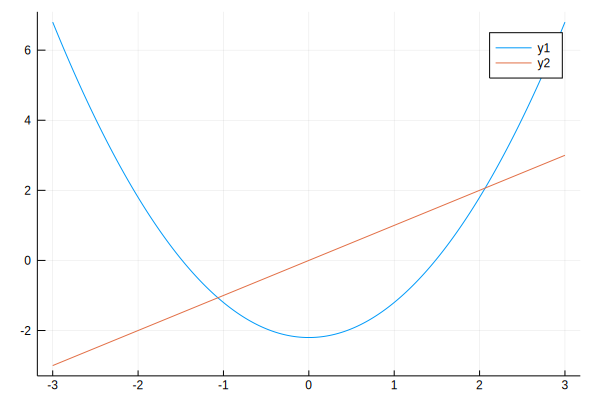

In [24]:
xrange = -3:1/128:3
p1 = plot(xrange, x->Qc(x,1/4))
plot!(xrange,x->x)
p2 = plot(xrange, x->Qc(x,0.0))
plot!(xrange, x->x)
p3 = plot(xrange, x->Qc(x,-3/4))
plot!(xrange, x->x)
p4 = plot(xrange, x->Qc(x,-1.0))
plot!(xrange, x->x)
p5 = plot(xrange, x->Qc(x,-2.0))
plot!(xrange, x->x)
p6 = plot(xrange, x->Qc(x,-2.2))
plot!(xrange, x->x)


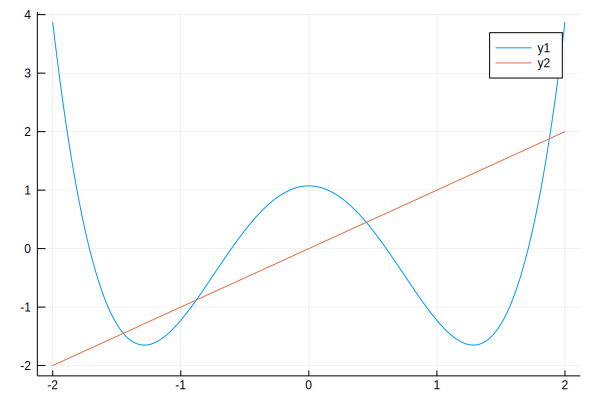

In [26]:
x = -2:1/128:2
P1 = plot(x, x->Qcⁿ(x,(-3/4,2)))
plot!(x, x->x)
P2 = plot(x, x->Qcⁿ(x,(-1.0,2)))
plot!(x, x->x)
P3 = plot(x, x->Qcⁿ(x,(-5/4,2)))
plot!(x, x->x)
P4 = plot(x, x->Qcⁿ(x,(C2,2)))
plot!(x, x->x)
P5 = plot(x, x->Qcⁿ(x,(-1.546,2)))
plot!(x, x->x)
P6 = plot(x, x->Qcⁿ(x,(-1.65,2)))
plot!(x, x->x)

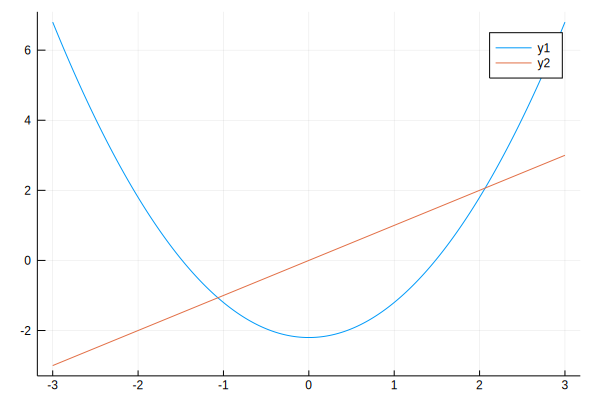

In [47]:
p6

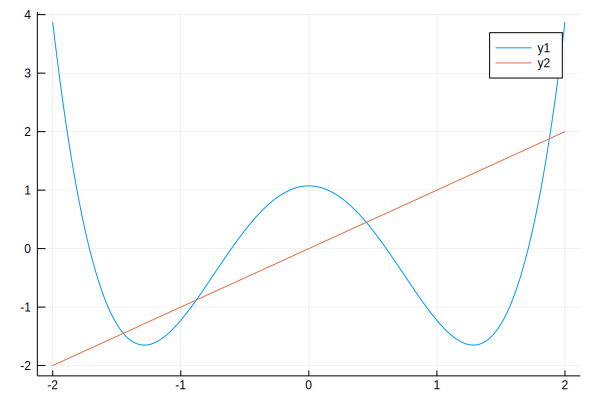

In [48]:
P6

In [53]:
"""
mapeo(f,xo,n)  
f: es una función f(x) arbitraria
xo: condición inicial
n: número de iteraciones
"""
function mapeo(f,xo,n)
    X = [xo]
    for i in 1:n
        xo = f(xo)
        push!(X,xo)
    end
    return xo
end

mapeo

In [49]:
"""
La función `gráfica(f,xo,n,a,b)` mapea en 2D la órbita de la función f(x)
a partir de la condición inicial `x_o`, un número `n` de iteraciones, en el intervalo (a,b)
"""
function gráfica(f,xo,n, a, b)
    rango_xo = a:1/32:b
    
    R = []
    for i in 1:length(rango_xo)
        push!(R,f(rango_xo[i]))
    end
    
    min = minimum(R)
    max = maximum(R)
    
    plot(rango_xo, f,
        xaxis=("x", (a, b)), 
        yaxis=((min-abs(min)/3, max+abs(max)/3), "F(x)"), legend = false, title = "F(x)", grid = false)
    plot!(rango_xo, x->x, color = :red)
    
    X = [xo,xo]
    Y = [min-abs(min)/3]
    
    for i in 1:n
        push!(X, mapeo(f,xo,i))
        push!(X, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
    end
    pop!(X)
    
    plot!(X,Y, line = (:green, :path, 2.0, :dot), marker=(:dot, 0.5))
end

function gráfica!(f,xo,n, a, b)         #Para agregar más órbitas a la misma gráfica.
    
    rango_xo = a:1/32:b
    
    R = []
    for i in 1:length(rango_xo)
        push!(R,f(rango_xo[i]))
    end
    
    min = minimum(R)
    
    X = [xo,xo]
    Y = [min-abs(min)/3]
    
    for i in 1:n
        push!(X, mapeo(f,xo,i))
        push!(X, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
    end
    pop!(X)
    
    plot!(X,Y, line = (:path, 2.0, :dot), marker=(:dot, 0.5))
end

gráfica! (generic function with 1 method)

In [60]:
pp1 = gráfica(x->Qc(x,0.25),0.0, 10, -1,1)
PP1 = gráfica(x->Qcⁿ(x,(-3/4,2)), 0.0, 10, -2,2)
    
pp2 = gráfica(x->Qc(x,0.0), 0.5, 10, -1,1)
PP2 = gráfica(x->Qcⁿ(x,(-1.0,2)), 0.0, -2,2)
    
#pp3 = gráfica( x->Qc(x,-3/4), 0.0, 10, -2,2)
#PP3 = gráfica(x->Qcⁿ(x,(-5/4,2)), 0.0, 10, -2,2)
    
#pp4 = gráfica(x->Qc(x,-1.0), 0.0, 10, -2,2)
#PP4 = gráfica(x->Qcⁿ(x,(C2,2)), 0.0, 10, -2,2)
    
#pp5 = gráfica(x->Qc(x,-2.0), 0.0, 10, -2,2)
#PP5 = gráfica(x->Qcⁿ(x,(-1.546,2)), 0.0, 10, -2,2)
    
#pp6 = gráfica(x->Qc(x,-2.2), 0.0, 10, -2,2)
#PP6 = gráfica(x->Qcⁿ(x,(-1.65,2)), 0.0, 10, -2,2)


MethodError: MethodError: no method matching gráfica(::getfield(Main, Symbol("##167#168")), ::Float64, ::Int64, ::Int64)
Closest candidates are:
  gráfica(::Any, ::Any, ::Any, ::Any, !Matched::Any) at In[49]:6

**Ejercicio 5:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

**Ejercicio 6:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, usen el método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

# Constante $\alpha$ de Feigenbaum

El punto del análisis gráfico anterior es que, *localmente*, los mapeos $Q_{C_0}(x)$ y $Q^{2^n}_{C_n}(x)$ son muy similares, si uno se enfoca en un dominio muy particular para $Q^{2^n}_{C_n}(x)$.

Vale la pena notar que, en este caso, la distancia al punto fijo (que cruza la identidad) 
y que define los recuadros verdes, es $d_n = Q_{C_n}^{2^{n-1}}(0)\approx -\alpha d_{n+1}$ (ver ejercicio 3 de la Tarea 5).

Esta observación se expresa de manera formal construyendo una función que localmente se comporta como $Q^{2^n}_{C_n}(x)$:

\begin{equation}
g_1(x) = \lim_{n\to\infty} (-\alpha)^n Q_{C_{n+1}}^{2^n}\;\Big(\frac{x}{(-\alpha)^n}\Big).
\end{equation}

El límite $n\to\infty$ hace que todas las particularidades del mapeo $Q_c(x)$ se pierdan y, en este sentido, que sólo las propiedades que son *universales* resten.

La ecuación anterior se generaliza a:

\begin{equation}
g_i(x) = \lim_{n\to\infty} (-\alpha)^n Q_{C_{n+i}}^{2^n}\;\Big(\frac{x}{(-\alpha)^n}\Big),
\end{equation}




De la definición de $g_i(x)$, uno puede demostrar las funciones $g_i(x)$ satisfacen la ecuación

\begin{equation}
g_{i-1}(x) = -\alpha g_i\Big( g_i\big(-\,\frac{x}{\alpha}\big)\Big) ,
\end{equation}

que al tomar el límite $i\to \infty$ nos lleva a:

\begin{equation}
g(x) \equiv T g(x) = -\alpha g\Big( g\big(-\,\frac{x}{\alpha}\big)\Big),
\end{equation}

donde $T$ es el *operador de doblamiento de periodo*.


Si $g(x)$ satisface la ecuación anterior, entonces la función $\mu g(x/\mu)$, con $\mu\neq 0$, es también solución de la ecuación. Esta es una propiedad de escalamiento. De aquí, imponiendo que $g(0)=1$ se tiene $1=-\alpha g(1)$.

La idea es hacer un desarrollo en serie de Taylor de $g(x)$ cerca de $x=0$ a fin de obtener una aproximación de $\alpha$. De la ecuación de doblamiento de periodo uno obtiene:

\begin{eqnarray}
g'(x) &=& g'\Big( g\big(-\,\frac{x}{\alpha}\big) \Big) g'\big(-\,\frac{x}{\alpha}\big),\\
g''(x) &=& -g''\Big( g\big(-\,\frac{x}{\alpha}\big) \Big) \Big[ g'\big(-\,\frac{x}{\alpha}\big)\Big]^2
-\,\frac{1}{\alpha} g'\Big( g\big(-\,\frac{x}{\alpha}\big) \Big) g''\big(-\,\frac{x}{\alpha}\big).
\end{eqnarray}


De la primer ecuación podemos concluir que $g'(0)=0$. Por esto, a segundo orden tenemos que $g(x)\simeq 1+b x^2$. Sustituyendo esta aproximación en la ecuación de doblamiento de periodo y desarrollando *hasta* segundo orden, se obtiene:

\begin{equation}
1+b x^2 \simeq -\alpha\Big(1+b\big(1+b(-\frac{x}{\alpha})^2\big)^2\Big) = -\alpha\Big( 1+ b + \frac{2b^2}{\alpha^2}x^2\Big) + {\cal O}(x^4).
\end{equation}


Igualando término a término (potencias de $x$) tenemos que se debe satisfacer:

\begin{eqnarray}
1 &=& -\alpha(1 + b),\\
b &=& - 2b^2/\alpha.\\
\end{eqnarray}

De aquí obtenemos: $b \approx -\alpha/2$ y $\alpha\approx 1+\sqrt{3}=2.73\dots$; el valor de 
esta constante es $\alpha = 2.502907\dots$.

La otra constante de Feigenbaum se obtiene estudiando las propiedades de la ecuación linearizada en $c$.

## Referencia

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.